In [1]:
import train_config
from matplotlib import pyplot as plt
import os
import gc
import torch
import json
from train import begin_trianing

In [2]:
args = train_config.get_args()
print (json.dumps(args, indent=2, default=str))
# print(args)

{
  "cuda": true,
  "save": true,
  "save_dir": "./exprgb_auxloss_cosv7",
  "resume_path": null,
  "color_map": {
    "0": [
      0,
      0,
      0
    ],
    "1": [
      21,
      176,
      26
    ],
    "2": [
      5,
      73,
      7
    ],
    "3": [
      170,
      166,
      98
    ],
    "4": [
      229,
      0,
      0
    ],
    "5": [
      140,
      0,
      15
    ]
  },
  "num_class": 5,
  "train_dataset": {
    "name": "H2giga",
    "kwargs": {
      "root_dir": "../Data/augmented/H2giga",
      "type": "train",
      "class_id": null,
      "size": null,
      "normalize": true,
      "transform": "Compose(\n    RandomRotationsAndFlips(degrees=[-90.0, 90.0], interpolation=nearest, expand=False, fill=0)\n    <utils.transforms.ToTensor object at 0x7f7f8f955c70>\n)"
    },
    "batch_size": 20,
    "workers": 4
  },
  "val_dataset": {
    "name": "H2giga",
    "kwargs": {
      "root_dir": "../Data/augmented/H2giga",
      "type": "val",
      "normalize": true,


In [3]:
if args['save']:
    if not os.path.exists(args['save_dir']):
        os.makedirs(args['save_dir'])


In [4]:
#check device status
device = torch.device("cuda:0" if args['cuda'] & torch.cuda.is_available() else "cpu")
print('Using device:', device)
for i in range(torch.cuda.device_count()):
    print(torch.cuda.get_device_name(i))

Using device: cuda:0
NVIDIA A100-SXM4-40GB
NVIDIA A100-SXM4-40GB


In [ ]:
begin_trianing(args,device=device)

Creating branched hypernet with [4, 5] classes
initialize last layer with size:  torch.Size([32, 4, 2, 2])
Created spatial emb loss function with: to_center: True, n_sigma: 2
created logger with keys:  ('train', 'val', 'iou')
Starting epoch 0
learning rate: 0.0005


  0%|          | 0/31 [00:00<?, ?it/s]/opt/conda/lib/python3.8/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
100%|██████████| 4/4 [00:07<00:00,  1.86s/it]
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


image saved as ./exprgb_auxloss_cosv7/epoch_0_20220719_H2GIGA_000_012_snapshot_REF_011.png
===> train loss: 3.57
===> val loss: 4.09, val iou: 0.32
=> saving checkpoint
Starting epoch 1
learning rate: 0.0004954977417064171


100%|██████████| 4/4 [00:07<00:00,  1.78s/it]
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


image saved as ./exprgb_auxloss_cosv7/epoch_1_20220719_H2GIGA_000_056_snapshot_REF_022.png
===> train loss: 2.45
===> val loss: 3.12, val iou: 0.59
=> saving checkpoint
Starting epoch 2
learning rate: 0.0004909909332982877


100%|██████████| 4/4 [00:07<00:00,  1.84s/it]
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


image saved as ./exprgb_auxloss_cosv7/epoch_2_20220719_H2GIGA_000_056_snapshot_REF_027.png
===> train loss: 1.79
===> val loss: 1.57, val iou: 0.79
=> saving checkpoint
Starting epoch 3
learning rate: 0.0004864795236750653


100%|██████████| 4/4 [00:07<00:00,  1.82s/it]
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


image saved as ./exprgb_auxloss_cosv7/epoch_3_20220719_H2GIGA_000_008_snapshot_REF_007.png
===> train loss: 1.47
===> val loss: 1.43, val iou: 0.80
=> saving checkpoint
Starting epoch 4
learning rate: 0.00048196346062927547


100%|██████████| 4/4 [00:07<00:00,  1.88s/it]
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


image saved as ./exprgb_auxloss_cosv7/epoch_4_20220719_H2GIGA_000_008_snapshot_REF_018.png
===> train loss: 1.25
===> val loss: 1.14, val iou: 0.85
=> saving checkpoint
Starting epoch 5
learning rate: 0.00047744269081074987


100%|██████████| 4/4 [00:07<00:00,  1.81s/it]
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


image saved as ./exprgb_auxloss_cosv7/epoch_5_20220719_H2GIGA_000_056_snapshot_REF_026.png
===> train loss: 1.08
===> val loss: 1.02, val iou: 0.87
=> saving checkpoint
Starting epoch 6
learning rate: 0.000472917159689316


100%|██████████| 4/4 [00:07<00:00,  1.80s/it]
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


image saved as ./exprgb_auxloss_cosv7/epoch_6_20220719_H2GIGA_000_008_snapshot_REF_007.png
===> train loss: 0.93
===> val loss: 0.87, val iou: 0.88
=> saving checkpoint
Starting epoch 7
learning rate: 0.00046838681151585874


100%|██████████| 4/4 [00:07<00:00,  1.83s/it]
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


image saved as ./exprgb_auxloss_cosv7/epoch_7_20220719_H2GIGA_000_012_snapshot_REF_009.png
===> train loss: 0.81
===> val loss: 0.78, val iou: 0.87
=> saving checkpoint
Starting epoch 8
learning rate: 0.0004638515892816641


100%|██████████| 4/4 [00:07<00:00,  1.83s/it]
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


image saved as ./exprgb_auxloss_cosv7/epoch_8_20220719_H2GIGA_000_008_snapshot_REF_002.png
===> train loss: 0.73
===> val loss: 0.73, val iou: 0.88
=> saving checkpoint
Starting epoch 9
learning rate: 0.0004593114346759497


100%|██████████| 4/4 [00:07<00:00,  1.82s/it]
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


image saved as ./exprgb_auxloss_cosv7/epoch_9_20220719_H2GIGA_000_012_snapshot_REF_024.png
===> train loss: 0.66
===> val loss: 0.75, val iou: 0.88
=> saving checkpoint
Starting epoch 10
learning rate: 0.00045476628804148113


100%|██████████| 4/4 [00:07<00:00,  1.82s/it]
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


image saved as ./exprgb_auxloss_cosv7/epoch_10_20220719_H2GIGA_000_056_snapshot_REF_020.png
===> train loss: 0.61
===> val loss: 0.58, val iou: 0.89
=> saving checkpoint
Starting epoch 11
learning rate: 0.00045021608832816447


100%|██████████| 4/4 [00:07<00:00,  1.81s/it]
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


image saved as ./exprgb_auxloss_cosv7/epoch_11_20220719_H2GIGA_000_056_snapshot_REF_016.png
===> train loss: 0.54
===> val loss: 0.52, val iou: 0.90
=> saving checkpoint
Starting epoch 12
learning rate: 0.00044566077304449995


100%|██████████| 4/4 [00:07<00:00,  1.80s/it]
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


image saved as ./exprgb_auxloss_cosv7/epoch_12_20220719_H2GIGA_000_012_snapshot_REF_002.png
===> train loss: 0.50
===> val loss: 0.50, val iou: 0.90
=> saving checkpoint
Starting epoch 13
learning rate: 0.00044110027820677195


100%|██████████| 4/4 [00:07<00:00,  1.84s/it]
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


image saved as ./exprgb_auxloss_cosv7/epoch_13_20220719_H2GIGA_000_008_snapshot_REF_007.png
===> train loss: 0.48
===> val loss: 0.47, val iou: 0.90
=> saving checkpoint
Starting epoch 14
learning rate: 0.000436534538285843


100%|██████████| 4/4 [00:07<00:00,  1.81s/it]
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


image saved as ./exprgb_auxloss_cosv7/epoch_14_20220719_H2GIGA_000_008_snapshot_REF_005.png
===> train loss: 0.45
===> val loss: 0.50, val iou: 0.90
=> saving checkpoint
Starting epoch 15
learning rate: 0.00043196348615140955


100%|██████████| 4/4 [00:07<00:00,  1.81s/it]
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


image saved as ./exprgb_auxloss_cosv7/epoch_15_20220719_H2GIGA_000_012_snapshot_REF_001.png
===> train loss: 0.44
===> val loss: 0.43, val iou: 0.90
=> saving checkpoint
Starting epoch 16
learning rate: 0.00042738705301356716


100%|██████████| 4/4 [00:07<00:00,  1.86s/it]
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


image saved as ./exprgb_auxloss_cosv7/epoch_16_20220719_H2GIGA_000_056_snapshot_REF_006.png
===> train loss: 0.42
===> val loss: 0.40, val iou: 0.91
=> saving checkpoint
Starting epoch 17
learning rate: 0.00042280516836152096


100%|██████████| 4/4 [00:07<00:00,  1.82s/it]
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


image saved as ./exprgb_auxloss_cosv7/epoch_17_20220719_H2GIGA_000_008_snapshot_REF_004.png
===> train loss: 0.41
===> val loss: 0.46, val iou: 0.89
=> saving checkpoint
Starting epoch 18
learning rate: 0.00041821775989926696


100%|██████████| 4/4 [00:07<00:00,  1.83s/it]
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


image saved as ./exprgb_auxloss_cosv7/epoch_18_20220719_H2GIGA_000_012_snapshot_REF_008.png
===> train loss: 0.39
===> val loss: 0.40, val iou: 0.91
=> saving checkpoint
Starting epoch 19
learning rate: 0.0004136247534780547


100%|██████████| 4/4 [00:07<00:00,  1.90s/it]
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


image saved as ./exprgb_auxloss_cosv7/epoch_19_20220719_H2GIGA_000_008_snapshot_REF_001.png
===> train loss: 0.36
===> val loss: 0.39, val iou: 0.91
=> saving checkpoint
Starting epoch 20
learning rate: 0.00040902607302542923


100%|██████████| 4/4 [00:07<00:00,  1.82s/it]
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


image saved as ./exprgb_auxloss_cosv7/epoch_20_20220719_H2GIGA_000_008_snapshot_REF_023.png
===> train loss: 0.37
===> val loss: 0.38, val iou: 0.91
=> saving checkpoint
Starting epoch 21
learning rate: 0.00040442164047063304


100%|██████████| 4/4 [00:07<00:00,  1.86s/it]
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


image saved as ./exprgb_auxloss_cosv7/epoch_21_20220719_H2GIGA_000_056_snapshot_REF_023.png
===> train loss: 0.36
===> val loss: 0.41, val iou: 0.91
=> saving checkpoint
Starting epoch 22
learning rate: 0.0003998113756661346


100%|██████████| 4/4 [00:07<00:00,  1.79s/it]
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


image saved as ./exprgb_auxloss_cosv7/epoch_22_20220719_H2GIGA_000_056_snapshot_REF_004.png
===> train loss: 0.34
===> val loss: 0.36, val iou: 0.91
=> saving checkpoint
Starting epoch 23
learning rate: 0.0003951951963050278


100%|██████████| 4/4 [00:07<00:00,  1.84s/it]
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


image saved as ./exprgb_auxloss_cosv7/epoch_23_20220719_H2GIGA_000_056_snapshot_REF_003.png
===> train loss: 0.34
===> val loss: 0.36, val iou: 0.91
=> saving checkpoint
Starting epoch 24
learning rate: 0.0003905730178340304


100%|██████████| 4/4 [00:07<00:00,  1.82s/it]
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


image saved as ./exprgb_auxloss_cosv7/epoch_24_20220719_H2GIGA_000_012_snapshot_REF_007.png
===> train loss: 0.34
===> val loss: 0.36, val iou: 0.91
=> saving checkpoint
Starting epoch 25
learning rate: 0.00038594475336178527


100%|██████████| 4/4 [00:07<00:00,  1.83s/it]
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


image saved as ./exprgb_auxloss_cosv7/epoch_25_20220719_H2GIGA_000_012_snapshot_REF_012.png
===> train loss: 0.32
===> val loss: 0.34, val iou: 0.91
=> saving checkpoint
Starting epoch 26
learning rate: 0.0003813103135621442


100%|██████████| 4/4 [00:07<00:00,  1.83s/it]
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


image saved as ./exprgb_auxloss_cosv7/epoch_26_20220719_H2GIGA_000_008_snapshot_REF_013.png
===> train loss: 0.32
===> val loss: 0.47, val iou: 0.91
=> saving checkpoint
Starting epoch 27
learning rate: 0.0003766696065720893


100%|██████████| 4/4 [00:07<00:00,  1.84s/it]
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


image saved as ./exprgb_auxloss_cosv7/epoch_27_20220719_H2GIGA_000_008_snapshot_REF_012.png
===> train loss: 0.31
===> val loss: 0.32, val iou: 0.91
=> saving checkpoint
Starting epoch 28
learning rate: 0.0003720225378839164


100%|██████████| 4/4 [00:07<00:00,  1.87s/it]
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


image saved as ./exprgb_auxloss_cosv7/epoch_28_20220719_H2GIGA_000_012_snapshot_REF_014.png
===> train loss: 0.31
===> val loss: 0.35, val iou: 0.91
=> saving checkpoint
Starting epoch 29
learning rate: 0.00036736901023127285


100%|██████████| 4/4 [00:07<00:00,  1.79s/it]
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


image saved as ./exprgb_auxloss_cosv7/epoch_29_20220719_H2GIGA_000_056_snapshot_REF_021.png
===> train loss: 0.30
===> val loss: 0.32, val iou: 0.91
=> saving checkpoint
Starting epoch 30
learning rate: 0.00036270892346860996


100%|██████████| 4/4 [00:07<00:00,  1.82s/it]
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


image saved as ./exprgb_auxloss_cosv7/epoch_30_20220719_H2GIGA_000_008_snapshot_REF_018.png
===> train loss: 0.30
===> val loss: 0.34, val iou: 0.91
=> saving checkpoint
Starting epoch 31
learning rate: 0.00035804217444356787


100%|██████████| 4/4 [00:07<00:00,  1.83s/it]
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


image saved as ./exprgb_auxloss_cosv7/epoch_31_20220719_H2GIGA_000_056_snapshot_REF_003.png
===> train loss: 0.29
===> val loss: 0.32, val iou: 0.91
=> saving checkpoint
Starting epoch 32
learning rate: 0.00035336865686177077


100%|██████████| 4/4 [00:07<00:00,  1.93s/it]
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


image saved as ./exprgb_auxloss_cosv7/epoch_32_20220719_H2GIGA_000_056_snapshot_REF_013.png
===> train loss: 0.29
===> val loss: 0.33, val iou: 0.91
=> saving checkpoint
Starting epoch 33
learning rate: 0.00034868826114346313


100%|██████████| 4/4 [00:07<00:00,  1.87s/it]
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


image saved as ./exprgb_auxloss_cosv7/epoch_33_20220719_H2GIGA_000_056_snapshot_REF_000.png
===> train loss: 0.29
===> val loss: 0.33, val iou: 0.91
=> saving checkpoint
Starting epoch 34
learning rate: 0.00034400087427136414


100%|██████████| 4/4 [00:07<00:00,  1.82s/it]
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


image saved as ./exprgb_auxloss_cosv7/epoch_34_20220719_H2GIGA_000_056_snapshot_REF_004.png
===> train loss: 0.28
===> val loss: 0.35, val iou: 0.91
=> saving checkpoint
Starting epoch 35
learning rate: 0.0003393063796290625


100%|██████████| 4/4 [00:07<00:00,  1.80s/it]
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


image saved as ./exprgb_auxloss_cosv7/epoch_35_20220719_H2GIGA_000_008_snapshot_REF_014.png
===> train loss: 0.28
===> val loss: 0.33, val iou: 0.91
=> saving checkpoint
Starting epoch 36
learning rate: 0.0003346046568292074


100%|██████████| 4/4 [00:07<00:00,  1.81s/it]
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


image saved as ./exprgb_auxloss_cosv7/epoch_36_20220719_H2GIGA_000_056_snapshot_REF_020.png
===> train loss: 0.28
===> val loss: 0.33, val iou: 0.91
=> saving checkpoint
Starting epoch 37
learning rate: 0.00032989558153068285


100%|██████████| 4/4 [00:07<00:00,  1.78s/it]
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


image saved as ./exprgb_auxloss_cosv7/epoch_37_20220719_H2GIGA_000_008_snapshot_REF_017.png
===> train loss: 0.28
===> val loss: 0.32, val iou: 0.91
=> saving checkpoint
Starting epoch 38
learning rate: 0.000325179025243871


100%|██████████| 4/4 [00:07<00:00,  1.85s/it]
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


image saved as ./exprgb_auxloss_cosv7/epoch_38_20220719_H2GIGA_000_056_snapshot_REF_019.png
===> train loss: 0.27
===> val loss: 0.32, val iou: 0.91
=> saving checkpoint
Starting epoch 39
learning rate: 0.00032045485512302606


100%|██████████| 4/4 [00:07<00:00,  1.81s/it]
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


image saved as ./exprgb_auxloss_cosv7/epoch_39_20220719_H2GIGA_000_012_snapshot_REF_004.png
===> train loss: 0.28
===> val loss: 0.33, val iou: 0.91
=> saving checkpoint
Starting epoch 40
learning rate: 0.00031572293374467766


  0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# import sys
# sys.exit()
import torch
torch.cuda.empty_cache()
import gc
gc.collect()
gc.collect()
import os

os._exit(00)


In [2]:
import test_config

from test import begin_test

args = test_config.get_args()


In [3]:
print (json.dumps(args, indent=2, default=str))

{
  "cuda": true,
  "display": true,
  "save": true,
  "save_dir": "./test_rgb_auxloss",
  "checkpoint_path": "./exprgb_auxloss_cosv5/checkpoint.pth",
  "color_map": {
    "0": [
      0,
      0,
      0
    ],
    "1": [
      21,
      176,
      26
    ],
    "2": [
      5,
      73,
      7
    ],
    "3": [
      170,
      166,
      98
    ],
    "4": [
      229,
      0,
      0
    ],
    "5": [
      140,
      0,
      15
    ]
  },
  "num_class": 5,
  "dataset": {
    "name": "H2giga",
    "kwargs": {
      "root_dir": "../Data/augmented_old/H2giga/",
      "type": "test",
      "class_id": null,
      "transform": "Compose(\n    <utils.transforms.ToTensor object at 0x7f9830454c40>\n)"
    }
  },
  "model": {
    "name": "branched_hypernet",
    "kwargs": {
      "in_channel": 3,
      "num_classes": [
        4,
        5
      ]
    }
  }
}


In [4]:
begin_test(args)


Creating branched hypernet with [4, 5] classes


100%|██████████| 22/22 [01:10<00:00,  3.20s/it]


In [4]:
from models.hypernet import HyperNet
import torch

In [6]:
input = torch.randn(20,164,416,416)
model = HyperNet(164,5)
output = model(input)
print(output.shape)

torch.Size([20, 5, 416, 416])


In [4]:
from datasets import get_dataset
train_dataset = get_dataset(args['train_dataset']['name'], args['train_dataset']['kwargs'])

In [ ]:
sample = train_dataset.__getitem__(1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<class 'torch.Tensor'> torch.Size([3, 416, 416])
<class 'torch.Tensor'> torch.Size([1, 416, 416])
dict_keys(['image', 'im_name', 'hs', 'instance', 'label'])


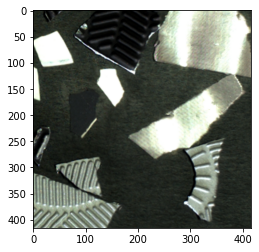

In [13]:
image = sample['image']
ins = sample['instance']
print(type(image),image.shape)
print(type(ins),ins.shape)
print(sample.keys())
plt.imshow(image.permute(1,2,0))

In [ ]:
a